# Augmented Reality with Planar Homographies

In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
def loadVid(path):
	# Create a VideoCapture object and read from input file
	# If the input is the camera, pass 0 instead of the video file name
	cap = cv2.VideoCapture(path)
	 
	# Check if camera opened successfully
	if (cap.isOpened()== False): 
		print("Error opening video stream or file")

	i = 0
	# Read until video is completed
	while(cap.isOpened()):
		# Capture frame-by-frame
		i += 1
		ret, frame = cap.read()
		if ret == True:

			#Store the resulting frame
			if i == 1:
				frames = frame[np.newaxis, ...]
			else:
				frame = frame[np.newaxis, ...]
				frames = np.vstack([frames, frame])
				frames = np.squeeze(frames)
			
		else: 
			break
	 
	# When everything done, release the video capture object
	cap.release()

	return frames


## Getting Correspondences

In [19]:
def find_correspondences(img1,img2):
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
                        
    sift = cv2.SIFT_create()
    # get keypoints and descriptors in each img
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
 
    good = []
    for m,n in matches:
        if m.distance/n.distance < 0.65:
            # m contains queryIdx, trainIdx which correspond to the indices of the matched keypoint1,keypoint2 in their respective lists
            good.append([m])
            #print(m.queryIdx)
            #print(m.trainIdx)
            
    
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15,10)), plt.imshow(img3),plt.show()
    

In [15]:
img1 = cv2.imread('cv_cover.jpg')
frames = loadVid('book.mov')


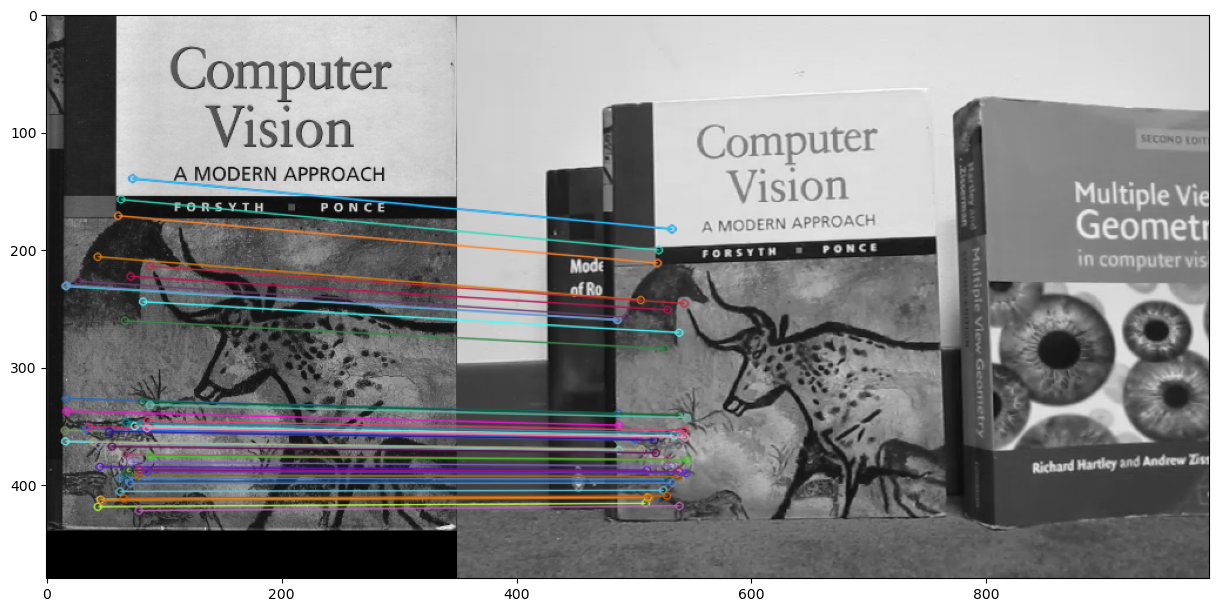

In [20]:
find_correspondences(img1,frames[0])